In [218]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from sklearn.impute import KNNImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Reading the dataset

df = pd.read_csv(r'train.csv',na_values="NAN")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [114]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [115]:
df.shape

(1460, 81)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [118]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [119]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [120]:
# !pip install sweetviz

In [121]:
#Auto EDA 
# import sweetviz as sv 
# sweet_report = sv.analyze(df,pairwise_analysis="off") 
# sweet_report.show_html('sweet_report.html')

In [122]:
# Checking missisng data

In [123]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['percent'])
missing_data.head(20)

percent
PoolQC        0.995205
MiscFeature   0.963014
Alley         0.937671
Fence         0.807534
FireplaceQu   0.472603
LotFrontage   0.177397
GarageYrBlt   0.055479
GarageCond    0.055479
GarageType    0.055479
GarageFinish  0.055479
GarageQual    0.055479
BsmtFinType2  0.026027
BsmtExposure  0.026027
BsmtQual      0.025342
BsmtCond      0.025342
BsmtFinType1  0.025342
MasVnrArea    0.005479
MasVnrType    0.005479
Electrical    0.000685
Id            0.000000

# Data Imputation

### As per data dictionary, NaN actually means something, so the nulls in these columns indicates the absence of facility which may affect the price
### Hence, we will first impute the categorical variables with 'None'

In [124]:
#As per dictionary following columns has null values that has some meaning
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['percent'])
missing_data.head(6)

percent
LotFrontage   0.177397
GarageYrBlt   0.055479
MasVnrArea    0.005479
Electrical    0.000685
KitchenAbvGr  0.000000
GarageType    0.000000

In [127]:
#The above columns has real NaN values that we have to deal with accordingly because they were not recorded
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [128]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['percent'])
missing_data.head(6)

percent
LotFrontage   0.177397
GarageYrBlt   0.055479
MasVnrArea    0.005479
Electrical    0.000685
KitchenAbvGr  0.000000
GarageType    0.000000

In [129]:
# LotFrontage still has too many Null values and it is a numerical value so it is better to drop it.

In [130]:
df.drop("LotFrontage", axis=1, inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [131]:
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['percent'])
missing_data.head(6)

percent
Electrical   0.000685
MSSubClass   0.000000
GarageYrBlt  0.000000
GarageType   0.000000
FireplaceQu  0.000000
Fireplaces   0.000000

In [132]:
# Dropping ID Column
df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  none      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  none      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  none      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  none      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  none      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
0    Inside       Gtl  ...        0   none  none        none       0       2   
1       FR2       Gtl  ...        0   none  none        none       0       5   
2    Inside       Gtl  ...        0   none  none        none       0       9   
3    Corner       Gtl  ...        0   none  none        none       0       2   
4       FR2       Gtl  ...        0   none  none        none       0      12   

   YrSold  SaleType  SaleCondition SalePrice  
0    2008        WD         Normal    208500  
1    2007        WD         Normal    181500  
2    2008        WD         Normal    223500  
3    2006        WD        Abnorml    140000  
4    2008        WD         Normal    250000  

[5 rows x 79 columns]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

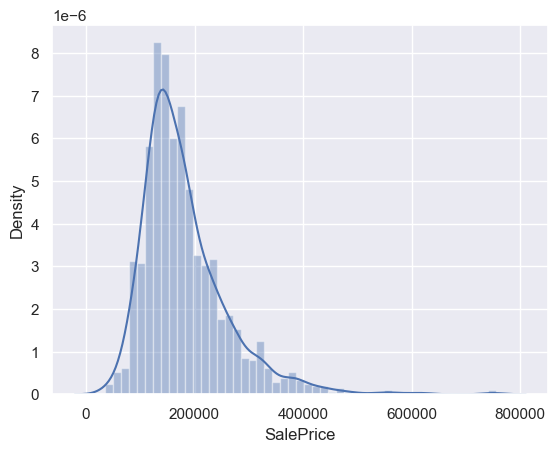

In [133]:
#Checking the relation b/w sales prices and other variables
sns.distplot(df['SalePrice'])

In [134]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


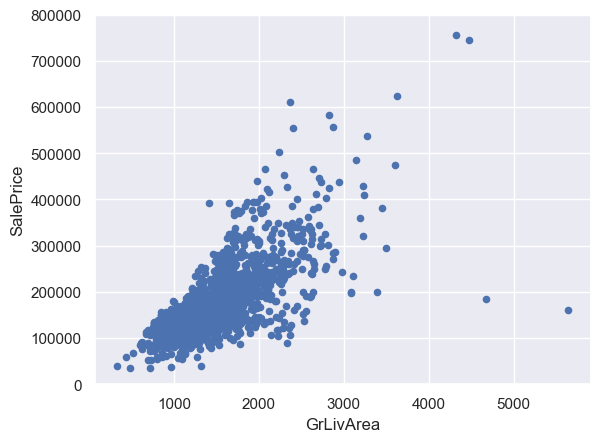

In [135]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

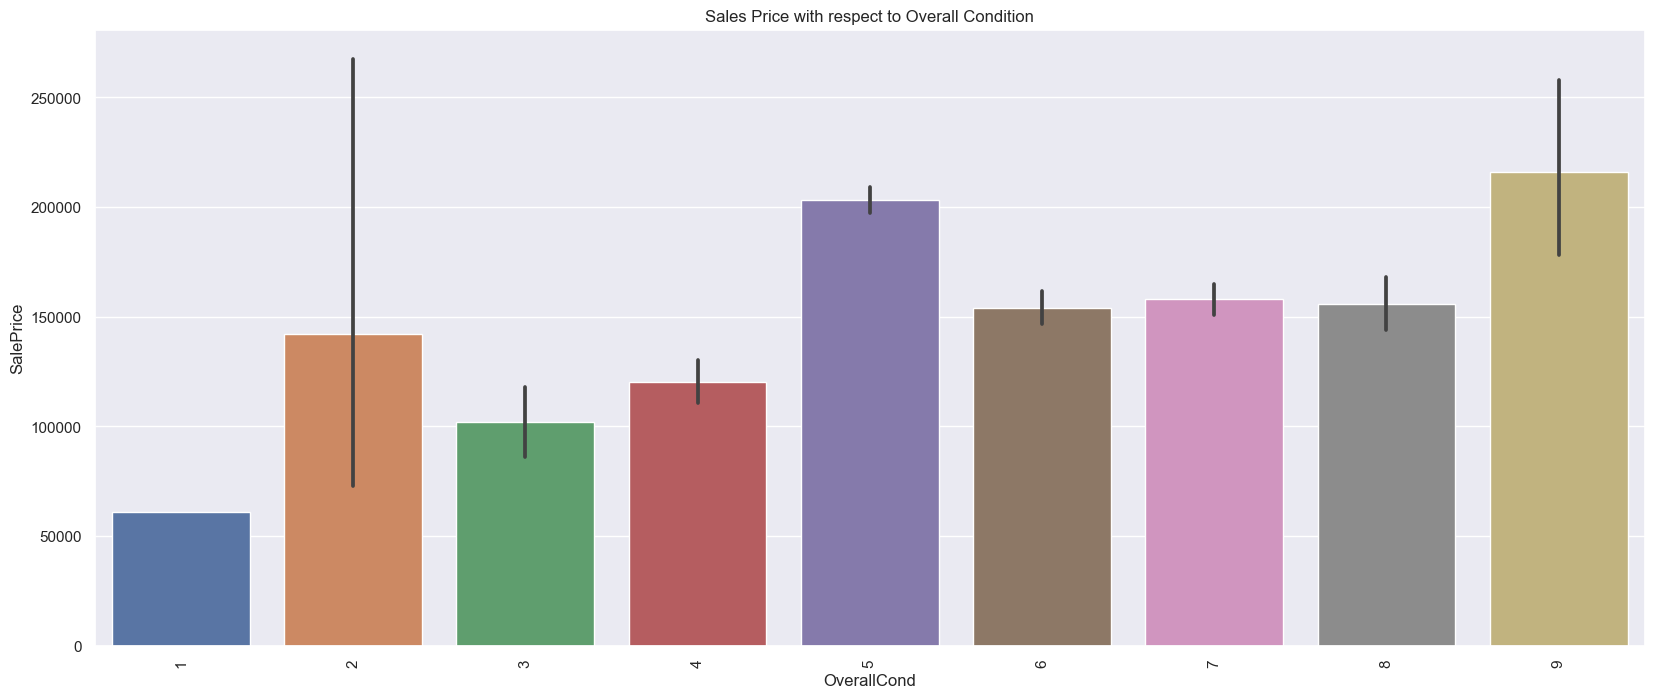

In [136]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

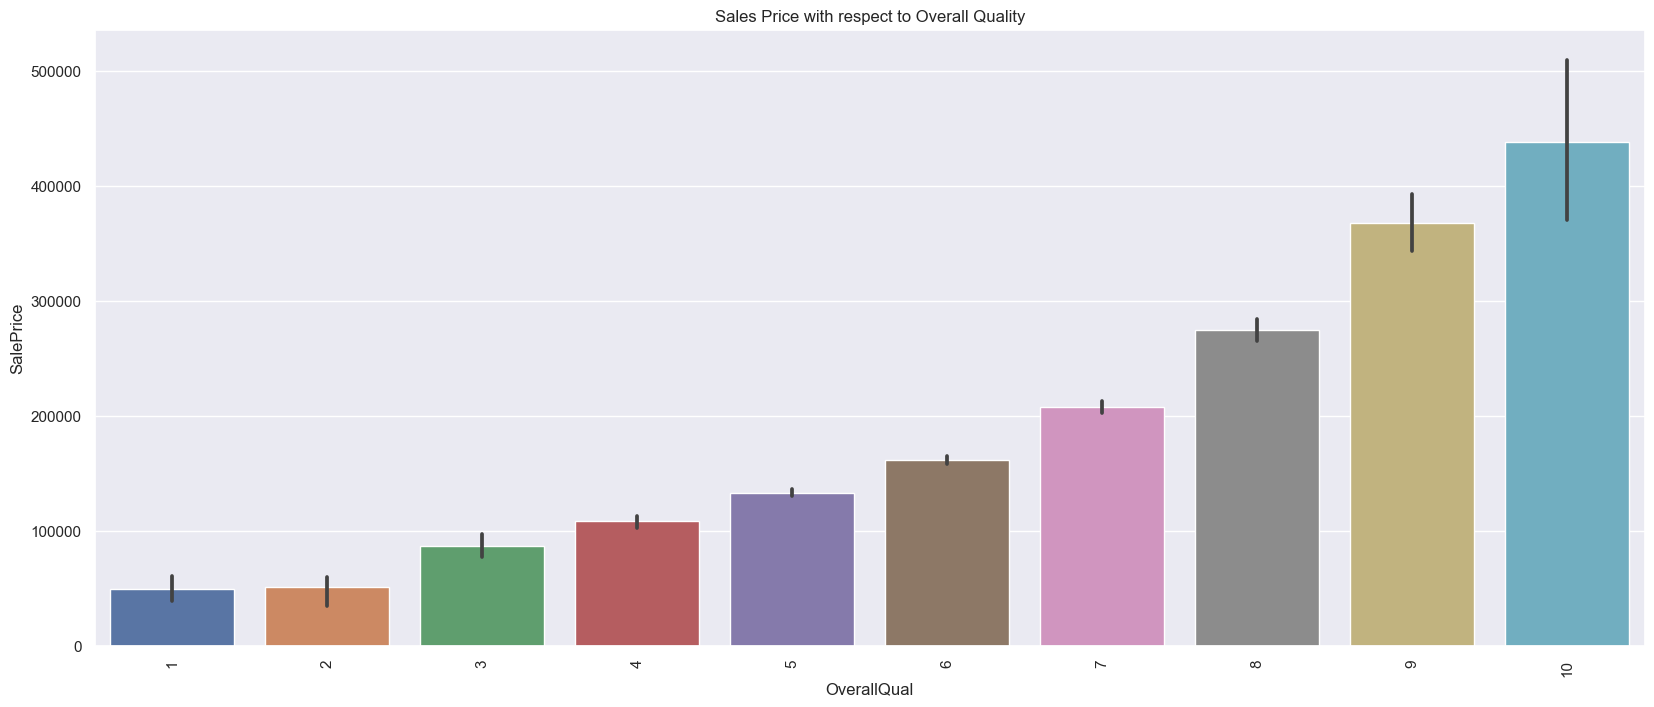

In [137]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

### Increase in the overall quality has a direct positive effect on the sale price

### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

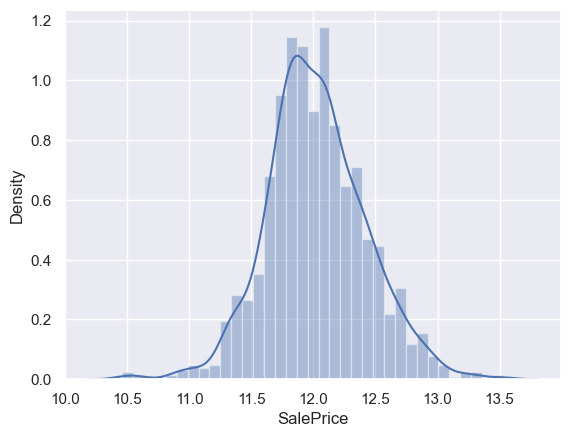

In [138]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])
sns.distplot(df['SalePrice'])

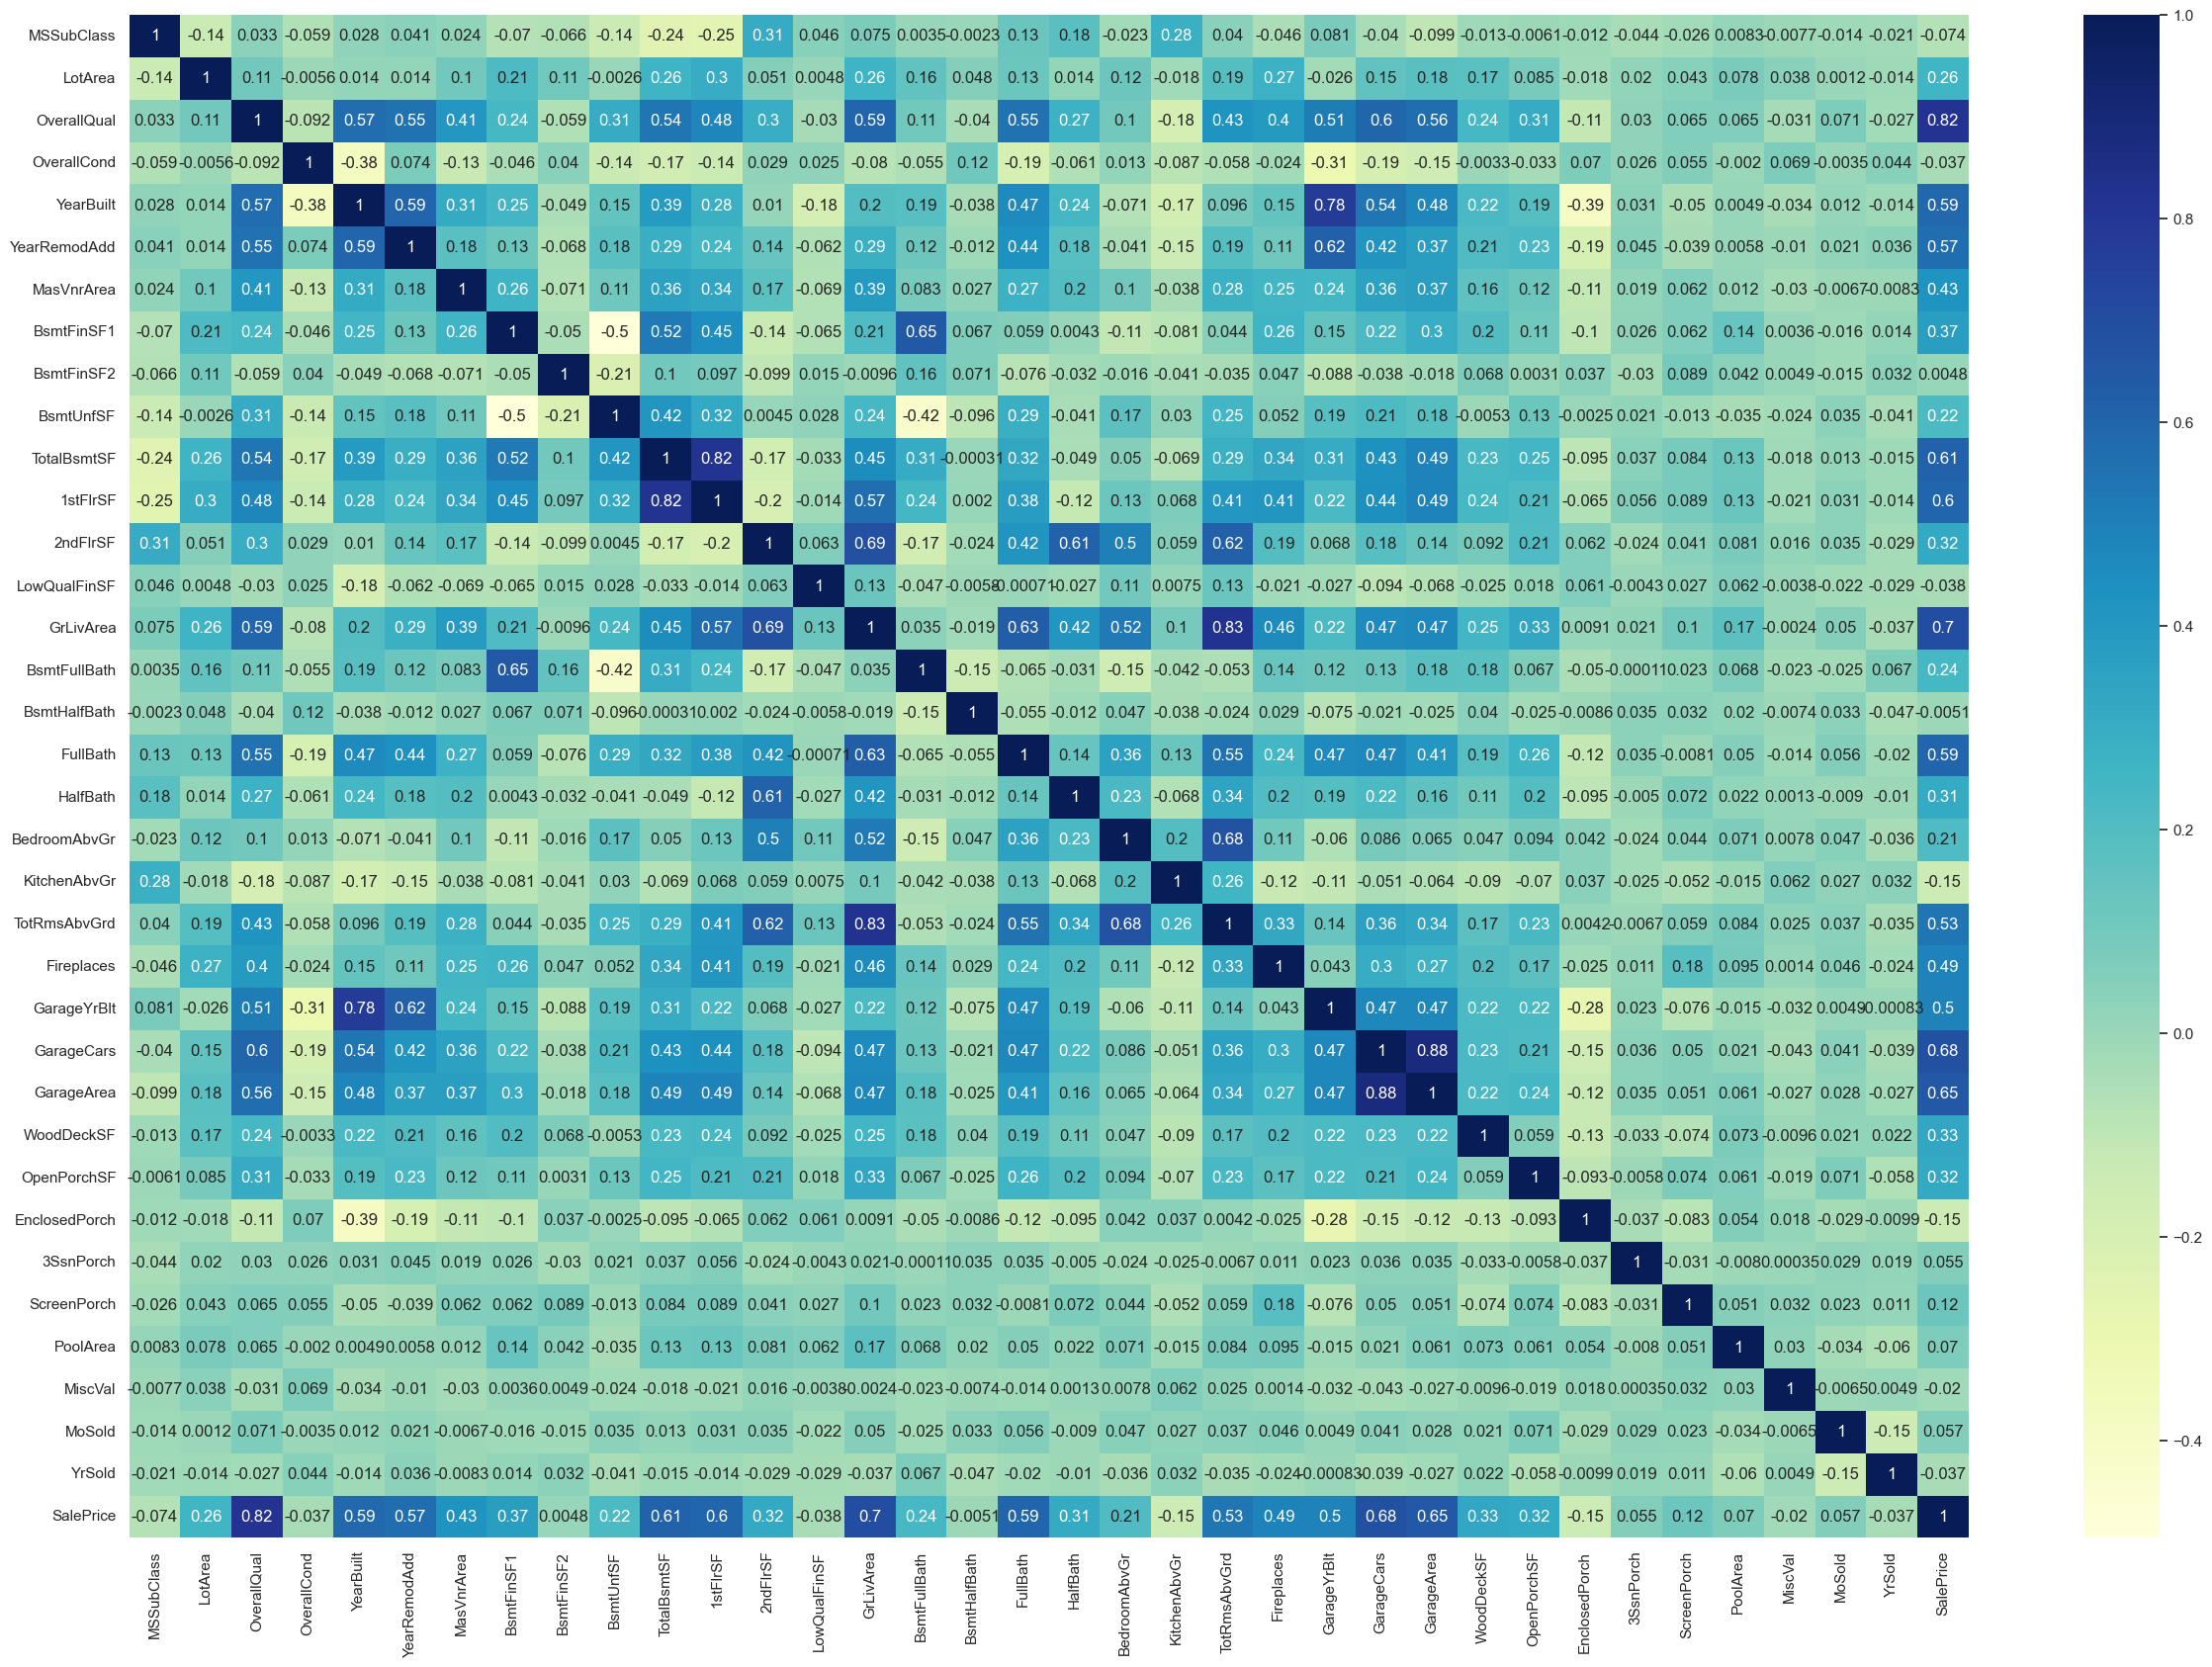

In [139]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### We can see that some of the variables are correlated
### Before dropping these columns, we will first check their predictive power

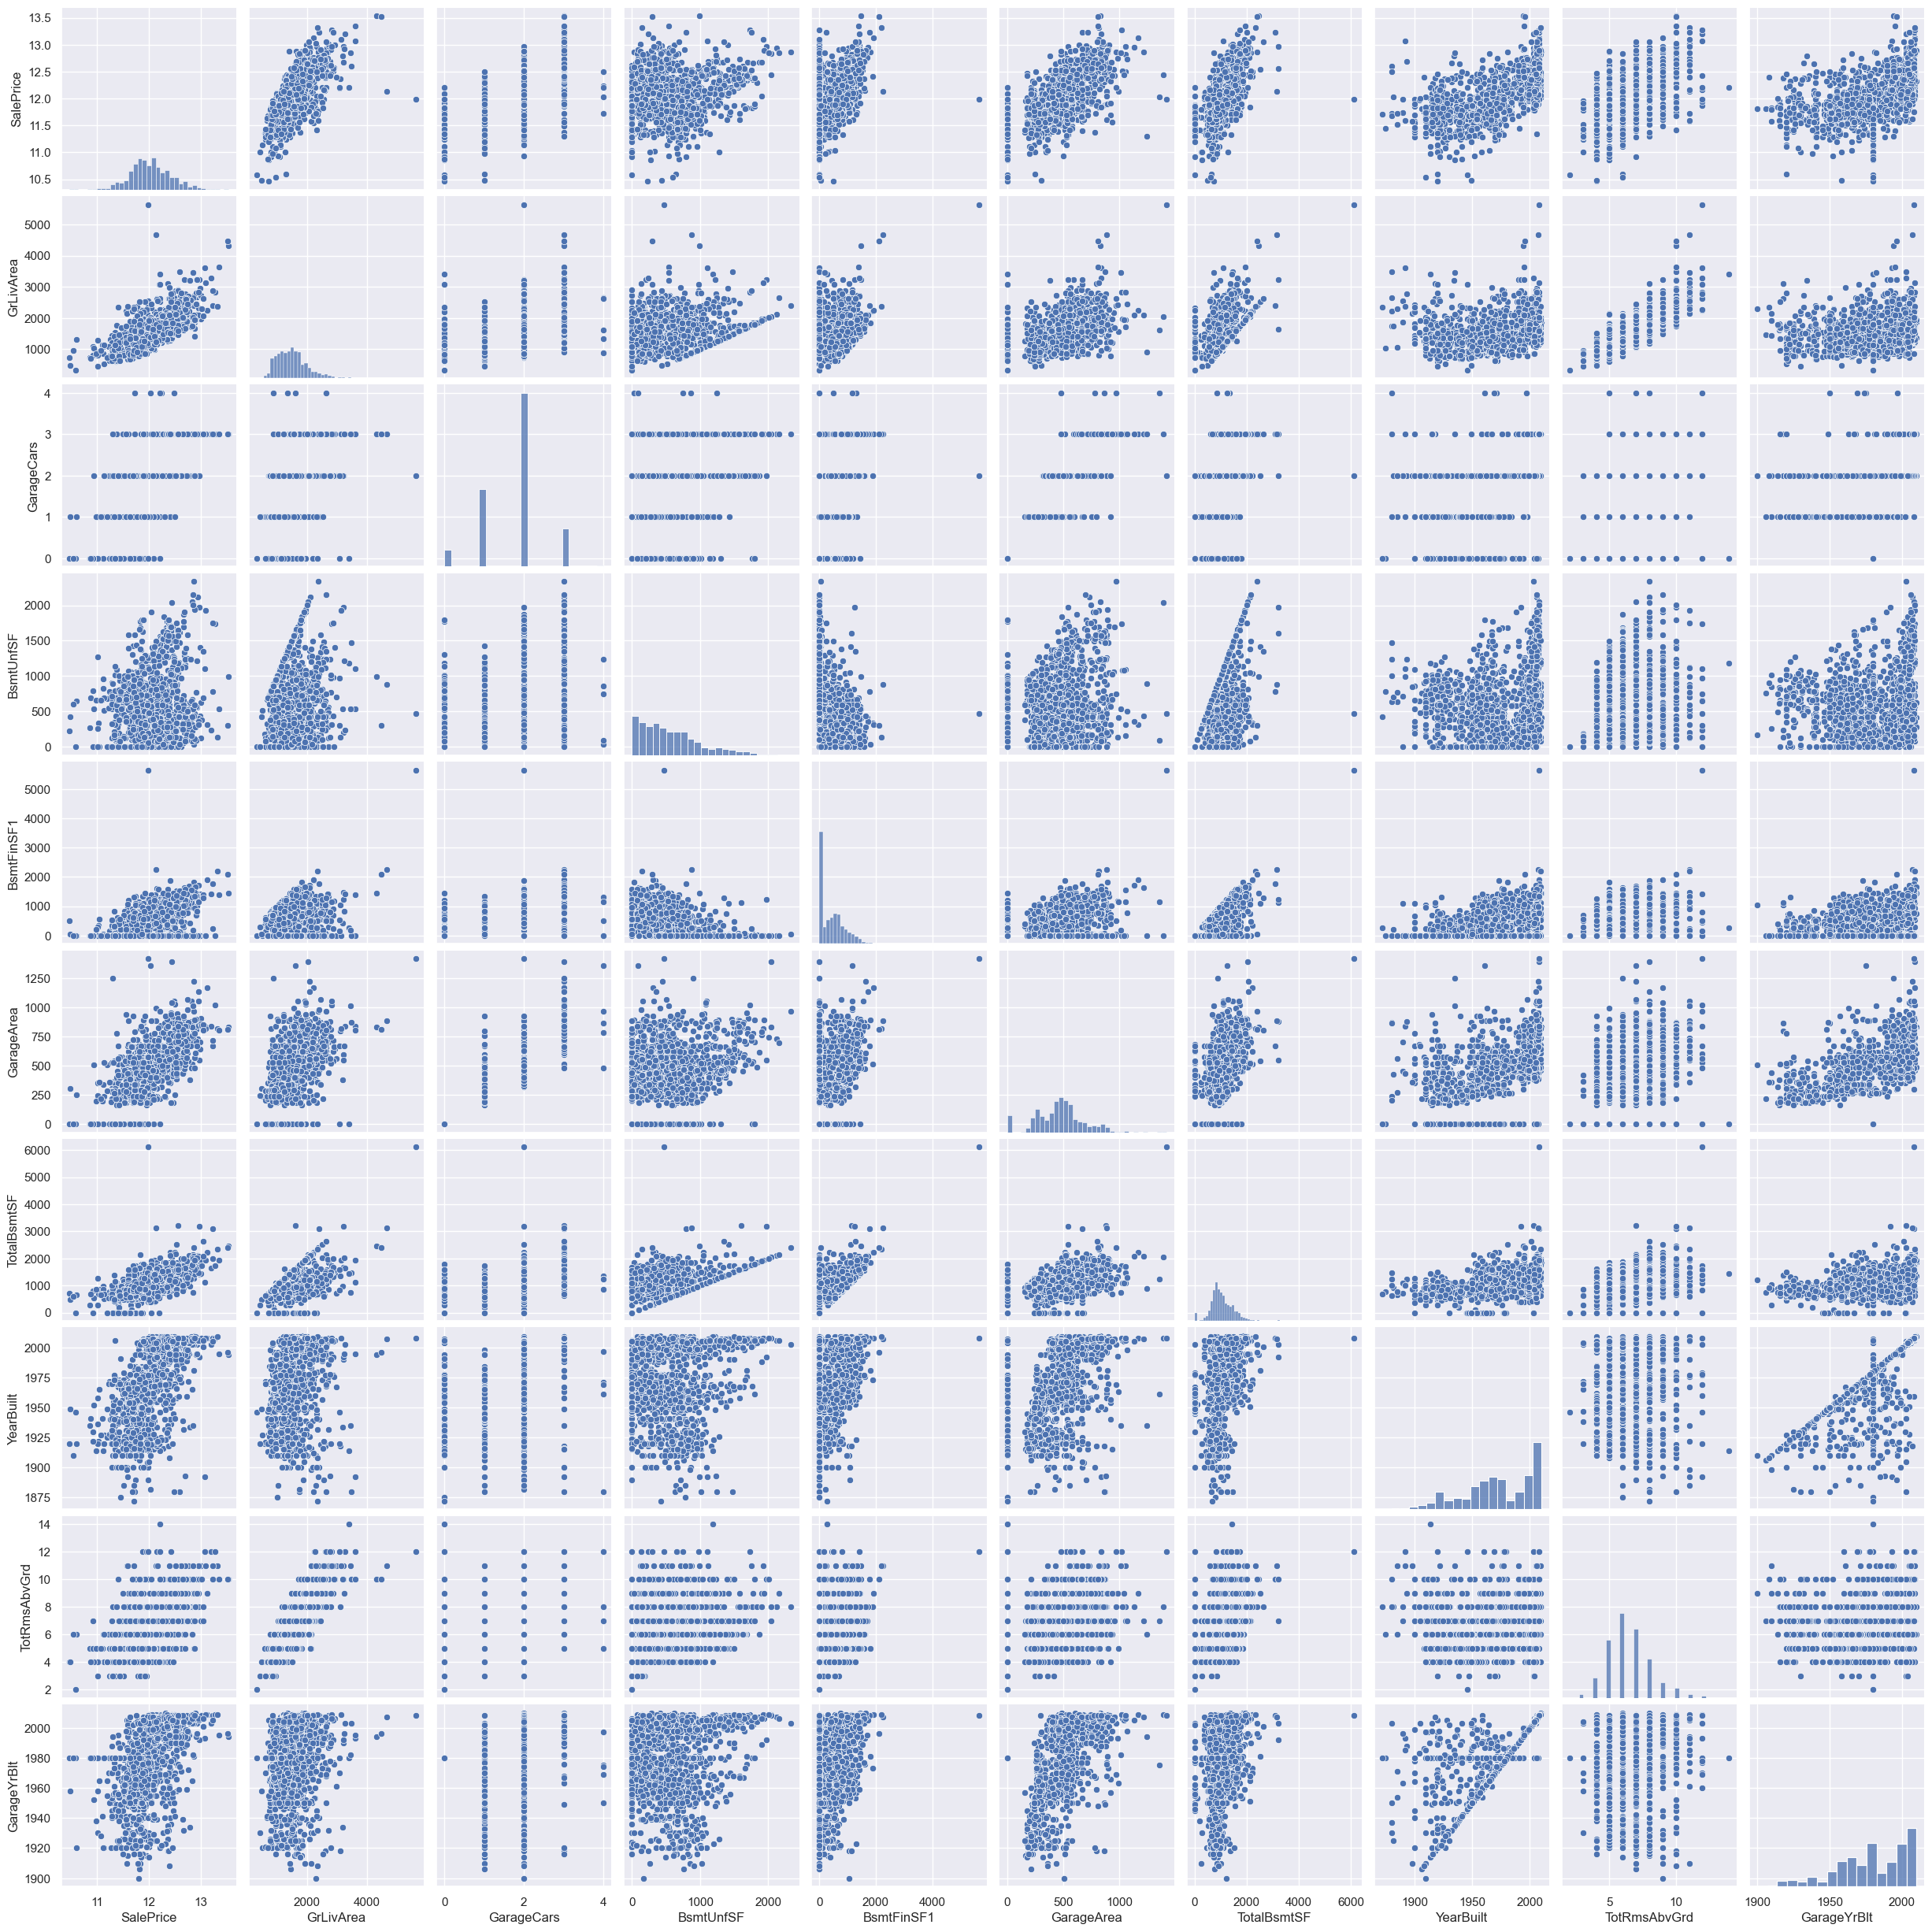

In [140]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

## Drop columns that are correlated and not contributing to 'SalePrice'

In [141]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  none      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  none      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  none      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  none      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  none      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
0    Inside       Gtl  ...        0   none  none        none       0       2   
1       FR2       Gtl  ...        0   none  none        none       0       5   
2    Inside       Gtl  ...        0   none  none        none       0       9   
3    Corner       Gtl  ...        0   none  none        none       0       2   
4       FR2       Gtl  ...        0   none  none        none       0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal  12.247699  
1    2007        WD         Normal  12.109016  
2    2008        WD         Normal  12.317171  
3    2006        WD        Abnorml  11.849405  
4    2008        WD         Normal  12.429220  

[5 rows x 75 columns]

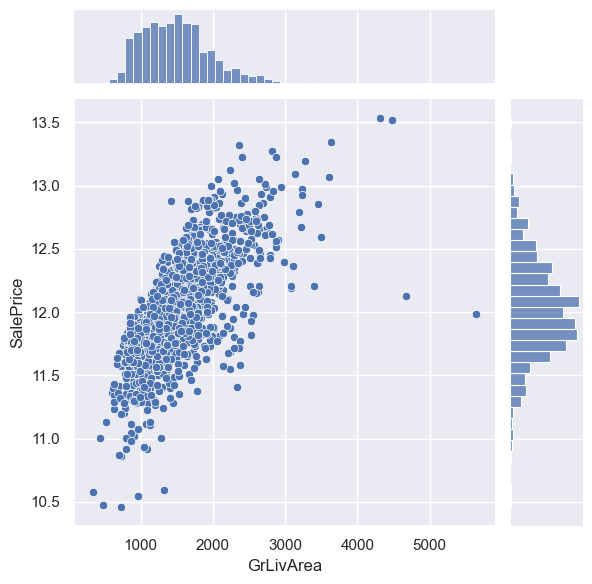

In [142]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

# As we can obsereve in above table, Outliers are present

In [143]:
# Treating Outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [144]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(df,'GrLivArea')

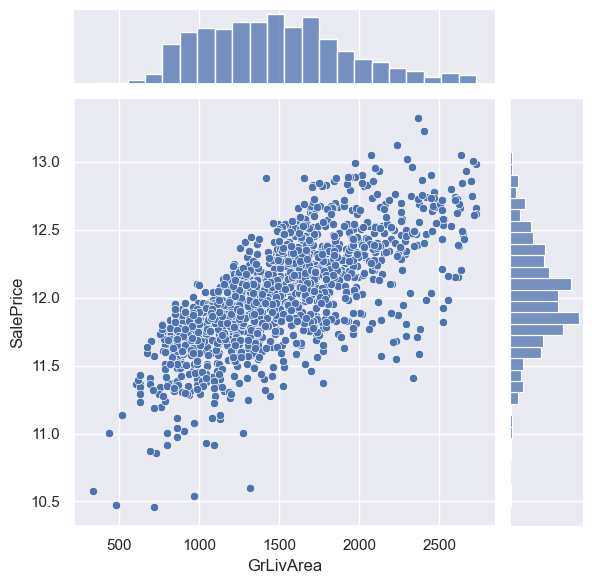

In [145]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

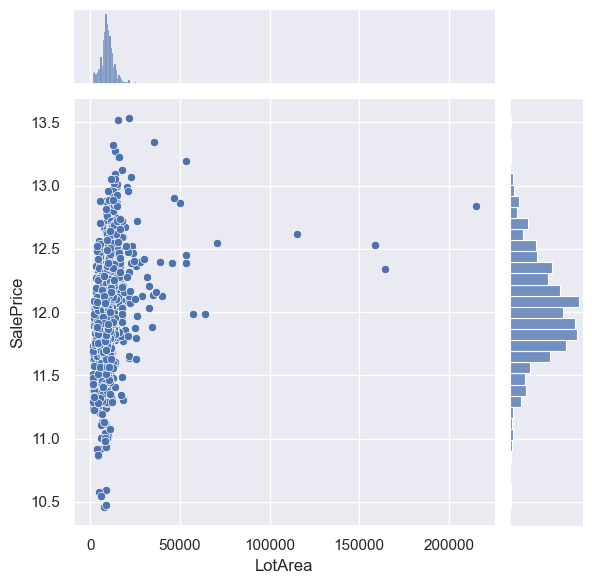

In [146]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

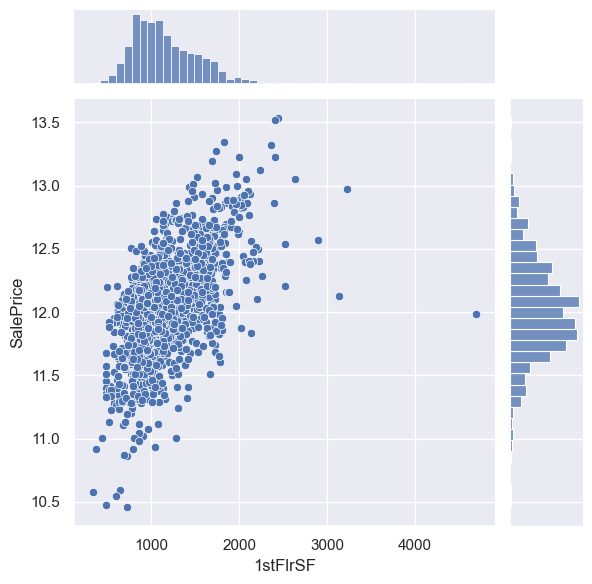

In [147]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

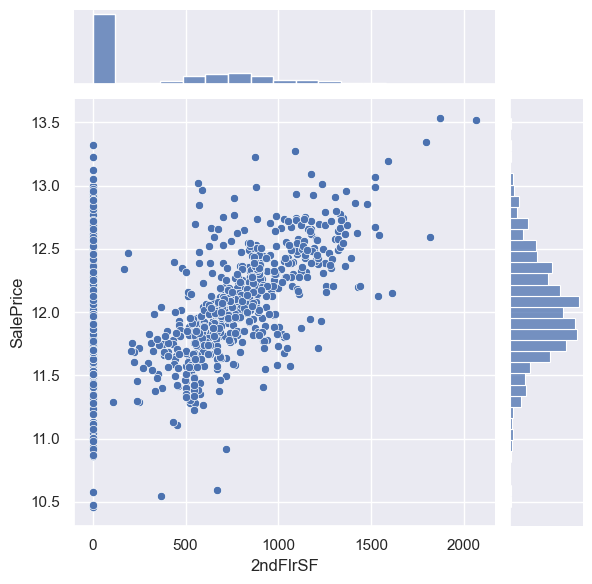

In [148]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

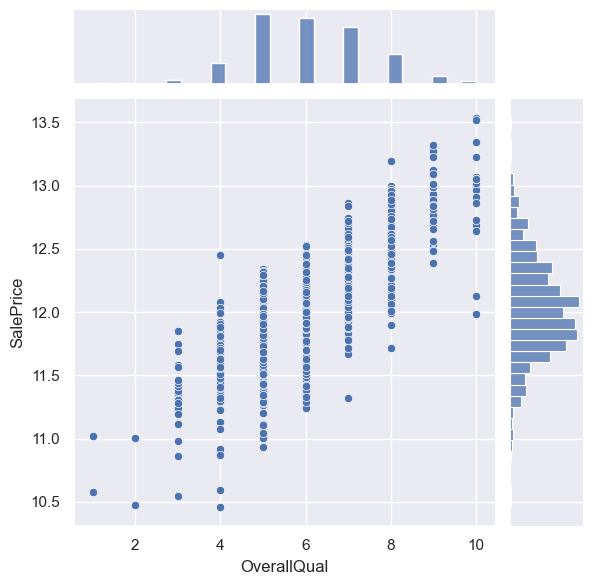

In [149]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

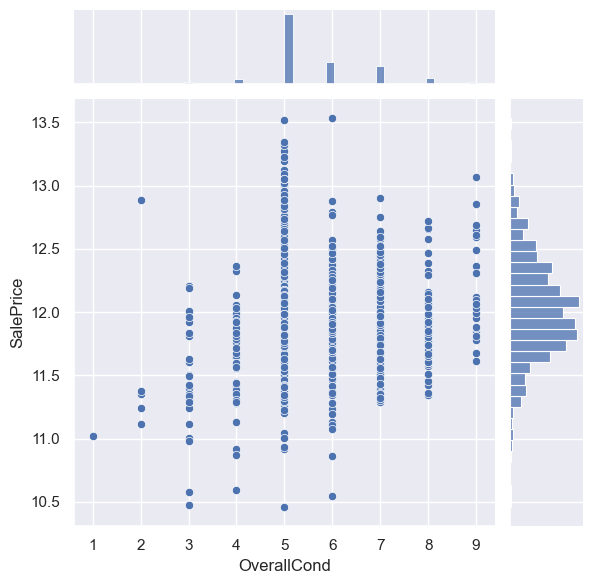

In [150]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [151]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  none      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  none      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  none      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  none      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  none      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... PoolQC Fence MiscFeature MiscVal MoSold  YrSold  \
0    Inside       Gtl  ...   none  none        none       0      2    2008   
1       FR2       Gtl  ...   none  none        none       0      5    2007   
2    Inside       Gtl  ...   none  none        none       0      9    2008   
3    Corner       Gtl  ...   none  none        none       0      2    2006   
4       FR2       Gtl  ...   none  none        none       0     12    2008   

   SaleType  SaleCondition  SalePrice PropAge  
0        WD         Normal  12.247699       5  
1        WD         Normal  12.109016      31  
2        WD         Normal  12.317171       7  
3        WD        Abnorml  11.849405      91  
4        WD         Normal  12.429220       8  

[5 rows x 76 columns]

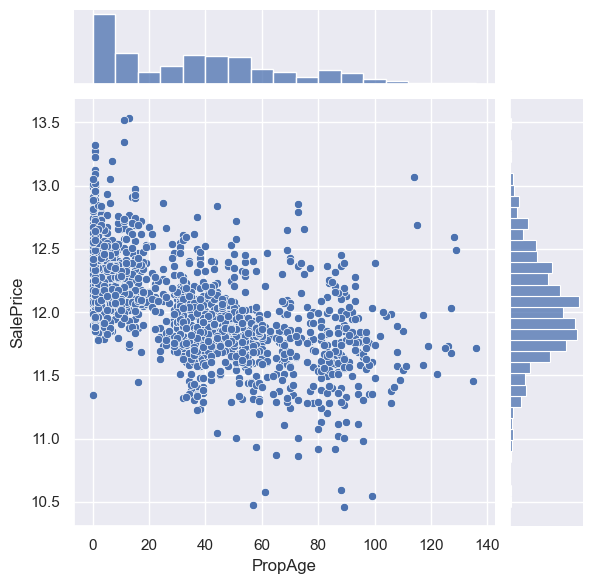

In [152]:
# PropAge vs SalePrice
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

## Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [153]:
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  none      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  none      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  none      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  none      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  none      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0    Inside       Gtl  ...           0        0   none  none        none   
1       FR2       Gtl  ...           0        0   none  none        none   
2    Inside       Gtl  ...           0        0   none  none        none   
3    Corner       Gtl  ...           0        0   none  none        none   
4       FR2       Gtl  ...           0        0   none  none        none   

   MiscVal  SaleType SaleCondition  SalePrice PropAge  
0        0        WD        Normal  12.247699       5  
1        0        WD        Normal  12.109016      31  
2        0        WD        Normal  12.317171       7  
3        0        WD       Abnorml  11.849405      91  
4        0        WD        Normal  12.429220       8  

[5 rows x 72 columns]

In [154]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [155]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [156]:
# We can also drop columns that show very low variance and thus not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

### Just to check the variance of these columns

In [157]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  WoodDeckSF  \
0          196.0         706           0          856  ...           0   
1            0.0         978           0         1262  ...         298   
2          162.0         486           0          920  ...           0   
3            0.0         216           0          756  ...           0   
4          350.0         655           0         1145  ...         192   
...          ...         ...         ...          ...  ...         ...   
1455         0.0           0           0          953  ...           0   
1456       119.0         790         163         1542  ...         349   
1457         0.0         275           0         1152  ...           0   
1458         0.0          49        1029         1078  ...         366   
1459         0.0         830         290         1256  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1429 rows x 32 columns]

In [158]:
df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

### These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.

In [159]:
df.shape

(1460, 61)

## Data Preparation

In [160]:
#Category columns
types_train=df.dtypes
categorical_values_train=types_train[types_train == object]
print(categorical_values_train.index)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


## Creating Dummy columns to convert categorical into numerical

In [161]:
df = pd.get_dummies(df, drop_first=True )
data.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  none      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  none      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  none      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  none      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  none      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
0    Inside       Gtl  ...        0   none  none        none       0       2   
1       FR2       Gtl  ...        0   none  none        none       0       5   
2    Inside       Gtl  ...        0   none  none        none       0       9   
3    Corner       Gtl  ...        0   none  none        none       0       2   
4       FR2       Gtl  ...        0   none  none        none       0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal  12.247699  
1    2007        WD         Normal  12.109016  
2    2008        WD         Normal  12.317171  
3    2006        WD        Abnorml  11.849405  
4    2008        WD         Normal  12.429220  

[5 rows x 75 columns]

In [162]:
X = df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0           0          856       856       854  ...               0   
1           0         1262      1262         0  ...               0   
2           0          920       920       866  ...               0   
3           0          756       961       756  ...               0   
4           0         1145      1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 210 columns]

In [163]:
# Putting response variable to y
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [164]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [167]:
X_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
175    -0.870387  0.166080    -0.059996     1.252715   -0.575015    0.085426   
1408    0.304785 -0.261043    -1.501313     1.252715   -0.575015   -0.943351   
1148   -0.165284 -0.439778     0.660663     1.252715   -0.575015   -0.943351   
861     3.125199  0.079341    -0.780655    -1.406374   -0.575015    0.870488   
220    -0.870387 -0.151525     0.660663    -0.520011   -0.575015   -0.943351   

      BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
175    -0.283127     0.347365  2.572160 -0.797551  ...               0   
1408   -0.283127    -0.973680 -1.069794  0.630928  ...               0   
1148   -0.283127    -1.087563 -1.504156  0.440311  ...               0   
861    -0.283127    -0.023894 -0.303879 -0.797551  ...               0   
220    -0.283127     1.021554  0.875837 -0.797551  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
175                0             0             0            1   
1408               0             0             0            1   
1148               0             0             0            1   
861                0             0             0            1   
220                0             1             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
175                       0                     0                     0   
1408                      0                     0                     0   
1148                      0                     0                     0   
861                       0                     0                     0   
220                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
175                      1                      0  
1408                     1                      0  
1148                     1                      0  
861                      1                      0  
220                      0                      1  

[5 rows x 210 columns]

In [168]:
X_test.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
930    -0.879672 -0.211538     1.358461    -0.509551   -0.560080   -1.009468   
530     0.559791  0.029981    -0.099887    -0.509551    0.597117    0.743814   
1291    2.479076 -1.583933    -0.829061     1.350309    0.856033   -0.518001   
1385   -0.159940 -0.872447    -1.558235     2.280239   -0.560080    0.634091   
305    -0.879672  0.065215     1.358461    -0.509551    0.739785    2.300508   

      BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
930    -0.301886     0.899165  0.771223 -0.791130  ...               0   
530    -0.301886     0.887692  0.884656 -0.791130  ...               0   
1291   -0.301886    -1.019124 -1.434127  0.740428  ...               0   
1385   -0.301886    -0.638220 -0.996222  0.024789  ...               0   
305    -0.301886     2.124484  2.179903 -0.791130  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
930                0             0             0            1   
530                0             0             0            1   
1291               0             0             0            1   
1385               0             0             0            1   
305                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
930                       0                     0                     0   
530                       0                     0                     0   
1291                      0                     0                     0   
1385                      0                     0                     0   
305                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
930                      1                      0  
530                      0                      0  
1291                     1                      0  
1385                     1                      0  
305                      1                      0  

[5 rows x 210 columns]

## Model Building 

In [169]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [170]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE for top 100 variables
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [171]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 88),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', False, 20),
 ('BsmtFinSF2', False, 105),
 ('TotalBsmtSF', False, 85),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 15),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 24),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 74),
 ('Fireplaces', False, 75),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 96),
 ('EnclosedPorch', False, 79),
 ('3SsnPorch', False, 92),
 ('ScreenPorch', False, 77),
 ('PoolArea', False, 61),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 37),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 86),
 ('LandContour_HLS', False, 2),
 ('LandContour_Low', False, 99)

In [172]:
# Select the top 100 variables
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [173]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'MiscFeature_TenC', 'MiscFeature_none',
       'SaleType_ConLI', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=105)

In [174]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [175]:
X_train_rfe = pd.DataFrame(X_train[col])

In [176]:
X_train_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
175     -0.059996     1.252715  2.572160 -0.797551     -0.121406   1.229791   
1408    -1.501313     1.252715 -1.069794  0.630928     -0.121406  -0.279140   
1148     0.660663     1.252715 -1.504156  0.440311     -0.121406  -0.757443   
861     -0.780655    -1.406374 -0.303879 -0.797551     -0.121406  -0.894101   
220      0.660663    -0.520011  0.875837 -0.797551     -0.121406  -0.022906   

      GarageArea   PropAge  MSZoning_FV  MSZoning_RH  ...  SaleType_CWD  \
175     0.478002  0.660066            0            0  ...             0   
1408    0.256615  2.066739            0            0  ...             0   
1148   -0.850325  1.477899            0            0  ...             0   
861     0.145921  0.267506            0            0  ...             0   
220     0.934615 -1.204594            0            0  ...             0   

      SaleType_Con  SaleType_ConLD  SaleType_ConLw  SaleType_New  \
175              0               0               0             0   
1408             0               0               0             0   
1148             0               0               0             0   
861              0               0               0             0   
220              0               0               0             1   

      SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Alloca  \
175              0                      0                     0   
1408             0                      0                     0   
1148             0                      0                     0   
861              0                      0                     0   
220              0                      0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
175                      1                      0  
1408                     1                      0  
1148                     1                      0  
861                      1                      0  
220                      0                      1  

[5 rows x 105 columns]

In [177]:
X_train_rfe.shape

(1021, 105)

In [178]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.926893564119321

In [179]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-6.768854706823339e+21

## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [180]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 88),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', False, 20),
 ('BsmtFinSF2', False, 105),
 ('TotalBsmtSF', False, 85),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 15),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 24),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 74),
 ('Fireplaces', False, 75),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 96),
 ('EnclosedPorch', False, 79),
 ('3SsnPorch', False, 92),
 ('ScreenPorch', False, 77),
 ('PoolArea', False, 61),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 37),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 86),
 ('LandContour_HLS', False, 2),
 ('LandContour_Low', False, 99)

In [181]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [182]:
X_test_rfe = X_test[col1]

In [183]:
X_test_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
930      1.358461    -0.509551  0.771223 -0.791130     -0.119344  -0.117457   
530     -0.099887    -0.509551  0.884656 -0.791130     -0.119344  -0.035051   
1291    -0.829061     1.350309 -1.434127  0.740428     -0.119344  -0.431748   
1385    -1.558235     2.280239 -0.996222  0.024789     -0.119344  -0.715377   
305      1.358461    -0.509551  2.179903 -0.791130     -0.119344   0.905907   

      GarageArea   PropAge  MSZoning_FV  MSZoning_RH  ...  SaleType_CWD  \
930     0.657098 -1.150291            0            0  ...             0   
530     0.608692 -0.539797            0            0  ...             0   
1291   -1.017758  0.036781            0            0  ...             0   
1385   -1.133933  1.766516            0            0  ...             0   
305     2.002793 -1.116375            0            0  ...             0   

      SaleType_Con  SaleType_ConLD  SaleType_ConLw  SaleType_New  \
930              0               0               0             0   
530              0               0               0             0   
1291             0               0               0             0   
1385             0               0               0             0   
305              0               0               0             0   

      SaleType_Oth  SaleCondition_AdjLand  SaleCondition_Alloca  \
930              0                      0                     0   
530              0                      0                     0   
1291             0                      0                     0   
1385             0                      0                     0   
305              0                      0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
930                      1                      0  
530                      0                      0  
1291                     1                      0  
1385                     1                      0  
305                      1                      0  

[5 rows x 105 columns]

# Lasso and Ridge Regression
### Let's now try predicting house prices and perform lasso and ridge regression.

#### Lasso Regression

In [184]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 210)
y_train (1021,)


In [185]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.063181      0.003404         0.002620        0.000344      0.0001   
1       0.016780      0.002501         0.003082        0.000470       0.001   
2       0.007131      0.000768         0.003085        0.000574        0.01   
3       0.006164      0.000691         0.003036        0.000421        0.05   
4       0.005868      0.000846         0.002907        0.000429         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099457          -0.082272          -0.102492   
1   {'alpha': 0.001}          -0.090006          -0.084116          -0.097320   
2    {'alpha': 0.01}          -0.104529          -0.098994          -0.100960   
3    {'alpha': 0.05}          -0.137308          -0.122382          -0.132828   
4     {'alpha': 0.1}          -0.168375          -0.146599          -0.166324   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.103130  ...        -0.096306        0.007697                2   
1          -0.103643  ...        -0.091966        0.007518                1   
2          -0.111877  ...        -0.101601        0.006640                3   
3          -0.139735  ...        -0.129816        0.008804                4   
4          -0.180801  ...        -0.162134        0.012886                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.071893           -0.077646           -0.072968   
1           -0.081775           -0.084896           -0.081044   
2           -0.099932           -0.102590           -0.098948   
3           -0.130586           -0.133071           -0.129419   
4           -0.162902           -0.163147           -0.160037   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.064715           -0.072674         -0.071979         0.004156  
1           -0.074628           -0.082003         -0.080869         0.003385  
2           -0.088947           -0.101095         -0.098302         0.004833  
3           -0.119567           -0.132747         -0.129078         0.004945  
4           -0.157388           -0.164734         -0.161641         0.002611  

[5 rows x 21 columns]

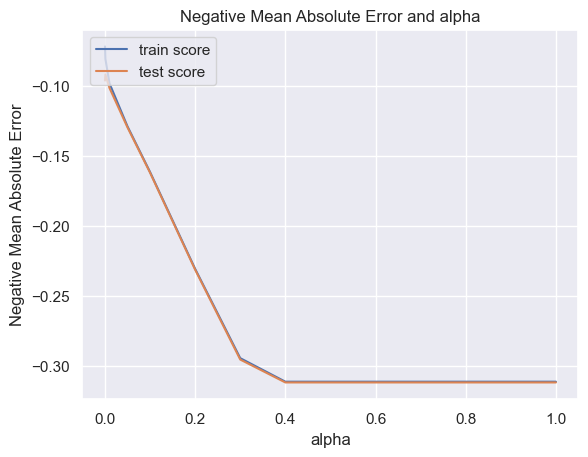

In [187]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,  but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [188]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01846807,  0.01472642,  0.13153056,  0.04861816,  0.        ,
        0.00642829,  0.        ,  0.01708671,  0.00568905,  0.        ,
       -0.        ,  0.11748501,  0.02913444,  0.        ,  0.0215384 ,
        0.00186385,  0.        , -0.0057371 ,  0.02609714,  0.04518928,
        0.00852853,  0.        ,  0.        ,  0.        ,  0.00787916,
       -0.01974318, -0.08982512,  0.        ,  0.        ,  0.00991468,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [189]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_

In [190]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8611514073213269
0.8503345341730444


In [191]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15372678715957186


#### The R2 values for Train and Test matches well, indicating an optimum model

In [192]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [193]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.011
1   MSSubClass  -0.018
2      LotArea   0.015
3  OverallQual   0.132
4  OverallCond   0.049

In [194]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0          constant  12.011
3       OverallQual   0.132
12        GrLivArea   0.117
4       OverallCond   0.049
20       GarageArea   0.045
..              ...     ...
86  HouseStyle_SLvl  -0.000
18     KitchenAbvGr  -0.006
1        MSSubClass  -0.018
26         PoolArea  -0.020
27          PropAge  -0.090

[211 rows x 2 columns]

In [195]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.011
3    OverallQual   0.132
12     GrLivArea   0.117
4    OverallCond   0.049
20    GarageArea   0.045
13  BsmtFullBath   0.029
19    Fireplaces   0.026
15      FullBath   0.022
8    TotalBsmtSF   0.017
2        LotArea   0.015
30   MSZoning_RL   0.010
21    WoodDeckSF   0.009
25   ScreenPorch   0.008
9       1stFlrSF   0.006
6     BsmtFinSF1   0.006
16      HalfBath   0.002
18  KitchenAbvGr  -0.006
1     MSSubClass  -0.018
26      PoolArea  -0.020
27       PropAge  -0.090

In [196]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(20, 2)

In [197]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']


In [198]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
175    1.229791    -0.059996     1.252715     0.347365    0.478002   
1408  -0.279140    -1.501313     1.252715    -0.973680    0.256615   
1148  -0.757443     0.660663     1.252715    -1.087563   -0.850325   
861   -0.894101    -0.780655    -1.406374    -0.023894    0.145921   
220   -0.022906     0.660663    -0.520011     1.021554    0.934615   

      BsmtFinSF1  Fireplaces   LotArea  BsmtFullBath  Foundation_PConc  \
175     0.085426    0.622339  0.166080      1.105326                 0   
1408   -0.943351   -0.935034 -0.261043     -0.807450                 0   
1148   -0.943351    0.622339 -0.439778     -0.807450                 1   
861     0.870488   -0.935034  0.079341      1.105326                 1   
220    -0.943351   -0.935034 -0.151525     -0.807450                 1   

      OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
175     -0.261563  0.786946    -0.260661   -0.740805  
1408    -0.721923 -1.006519     3.016768   -0.740805  
1148    -0.721923 -1.006519    -0.260661   -0.740805  
861     -0.721923 -1.006519    -0.260661   -0.740805  
220     -0.198065  0.786946    -0.260661    2.124358

In [199]:
X_train_lasso.shape

(1021, 14)

In [200]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
930   -0.117457     1.358461    -0.509551     0.899165    0.657098   
530   -0.035051    -0.099887    -0.509551     0.887692    0.608692   
1291  -0.431748    -0.829061     1.350309    -1.019124   -1.017758   
1385  -0.715377    -1.558235     2.280239    -0.638220   -1.133933   
305    0.905907     1.358461    -0.509551     2.124484    2.002793   

      BsmtFinSF1  Fireplaces   LotArea  BsmtFullBath  Foundation_PConc  \
930    -1.009468   -0.987888 -0.211538     -0.851855                 1   
530     0.743814    0.551952  0.029981      1.111895                 0   
1291   -0.518001   -0.987888 -1.583933     -0.851855                 0   
1385    0.634091   -0.987888 -0.872447      1.111895                 0   
305     2.300508   -0.987888  0.065215      1.111895                 1   

      OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
930     -0.427207  0.798671    -0.293788   -0.019795  
530     -0.673305  0.798671    -0.293788    0.924930  
1291    -0.673305  0.798671    -0.293788    0.627799  
1385     0.639219 -1.072013    -0.293788   -0.781670  
305     -0.673305  0.798671    -0.293788    0.498280

## Ridge Regression

In [201]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007439      0.000746         0.034659        0.062350      0.0001   
1       0.006358      0.000913         0.002836        0.000442       0.001   
2       0.006349      0.000783         0.003231        0.000462        0.01   
3       0.005956      0.000550         0.002721        0.000442        0.05   
4       0.005392      0.000416         0.002356        0.000204         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.111122          -0.087964          -0.110280   
1   {'alpha': 0.001}          -0.111092          -0.087935          -0.110244   
2    {'alpha': 0.01}          -0.110801          -0.087667          -0.109915   
3    {'alpha': 0.05}          -0.109653          -0.086646          -0.108720   
4     {'alpha': 0.1}          -0.108470          -0.085757          -0.107731   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.108091  ...        -0.103746        0.008616               27   
1          -0.108073  ...        -0.103711        0.008617               26   
2          -0.107909  ...        -0.103404        0.008628               25   
3          -0.107392  ...        -0.102346        0.008661               24   
4          -0.106963  ...        -0.101419        0.008673               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.070490           -0.075537           -0.071620   
1           -0.070491           -0.075538           -0.071620   
2           -0.070499           -0.075554           -0.071621   
3           -0.070535           -0.075680           -0.071650   
4           -0.070580           -0.075842           -0.071739   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.062409           -0.071617         -0.070335         0.004318  
1           -0.062411           -0.071620         -0.070336         0.004317  
2           -0.062429           -0.071651         -0.070351         0.004316  
3           -0.062513           -0.071783         -0.070432         0.004326  
4           -0.062615           -0.071916         -0.070539         0.004342  

[5 rows x 21 columns]

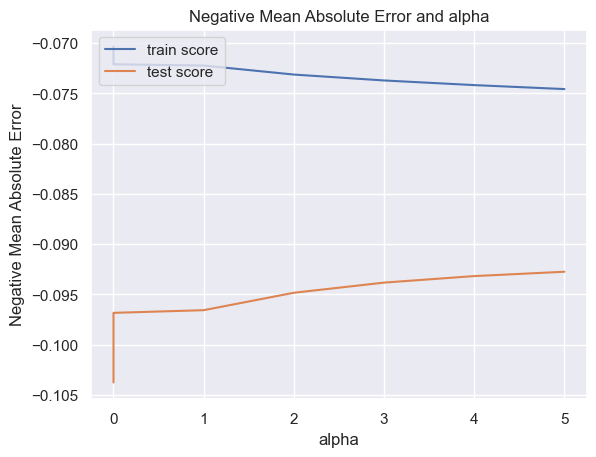

In [203]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [204]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.18452753e-02,  2.48652188e-02,  7.93465707e-02,  5.20024831e-02,
        2.17015362e-03, -1.12135954e-02,  6.40697489e-03, -7.52361290e-03,
        4.40249139e-02,  4.37441727e-02,  1.83347732e-03,  6.88233977e-02,
        2.89553021e-02,  2.86578011e-03,  3.31049345e-02,  1.96042172e-02,
        1.40681252e-02, -9.89005790e-03, -8.00797373e-03,  2.86607009e-02,
        9.38262144e-03,  4.79939375e-03,  1.12396802e-02,  5.11450054e-03,
        1.24370336e-02, -1.61430052e-02, -4.23997986e-02,  1.25156970e-01,
        1.36616843e-01,  1.17453464e-01,  8.24242949e-02,  2.05752959e-02,
       -9.47028390e-02,  4.99151911e-03,  1.66863085e-02,  3.99006309e-03,
        2.00479016e-02,  3.66569317e-02, -3.90264022e-02, -4.88233769e-02,
       -1.42407508e-02,  1.03437989e-02, -5.67767473e-02, -4.06023242e-02,
       -5.22117674e-02,  1.96352481e-02,  4.72436483e-02, -1.90246505e-02,
        1.01239433e-01, -9.77502957e-02, -1.95332758e-02, -9.17928091e-02,
       -1.44249890e-01, -

In [205]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.713),
 ('MSSubClass', -0.012),
 ('LotArea', 0.025),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.008),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.033),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.014),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.016),
 ('PropAge', -0.042),
 ('MSZoning_FV', 0.125),
 ('MSZoning_RH', 0.137),
 ('MSZoning_RL', 0.117),
 ('MSZoning_RM', 0.082),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.095),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.017),
 ('LandContour_Low', 0.004),
 ('LandContour_Lvl', 0.02),
 ('LotConfig_CulDSac', 0.037),
 ('LotConfig_FR2', -0.039),


In [206]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9230259647800546
0.873975192135284


In [207]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14106418750876562


### It is visible that the model performance is better than Lasso. The train and the test scores are matching well

In [208]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [209]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.713
29            MSZoning_RH   0.137
28            MSZoning_FV   0.125
30            MSZoning_RL   0.117
135      Foundation_Stone   0.105
204          SaleType_Oth   0.105
65   Neighborhood_StoneBr   0.103
94    Exterior1st_BrkFace   0.101
49   Neighborhood_Crawfor   0.101
110   Exterior2nd_CmentBd   0.087
31            MSZoning_RM   0.082
203          SaleType_New   0.079
90      RoofStyle_Mansard   0.079
3             OverallQual   0.079
59   Neighborhood_NridgHt   0.076
207  SaleCondition_Alloca   0.073
58   Neighborhood_NoRidge   0.073
165          CentralAir_Y   0.071
12              GrLivArea   0.069
209  SaleCondition_Normal   0.068

In [210]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.713
29            MSZoning_RH   0.137
28            MSZoning_FV   0.125
30            MSZoning_RL   0.117
135      Foundation_Stone   0.105
..                    ...     ...
33           LotShape_IR3  -0.095
82      HouseStyle_2.5Fin  -0.097
50   Neighborhood_Edwards  -0.098
93    Exterior1st_BrkComm  -0.104
53   Neighborhood_MeadowV  -0.144

[211 rows x 2 columns]

In [211]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.713
29            MSZoning_RH   0.137
28            MSZoning_FV   0.125
30            MSZoning_RL   0.117
135      Foundation_Stone   0.105
..                    ...     ...
33           LotShape_IR3  -0.095
82      HouseStyle_2.5Fin  -0.097
50   Neighborhood_Edwards  -0.098
93    Exterior1st_BrkComm  -0.104
53   Neighborhood_MeadowV  -0.144

[206 rows x 2 columns]

In [212]:
predRFE.shape

(206, 2)

#### Model Building after double the value of Alpha for Ridge and lasso

#### double the value of alpha for Ridge

In [213]:
ridge = Ridge(alpha=22)
ridge.fit(X_train, y_train)

Ridge(alpha=22)

In [214]:
## Make predictions

y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [226]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8907469393193409
0.873975192135284


In [233]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.848),
 ('MSSubClass', -0.018),
 ('LotArea', 0.019),
 ('OverallQual', 0.091),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.004),
 ('BsmtFinSF1', -0.003),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', 0.002),
 ('1stFlrSF', 0.042),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.064),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.035),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.014),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.02),
 ('PropAge', -0.049),
 ('MSZoning_FV', 0.025),
 ('MSZoning_RH', 0.023),
 ('MSZoning_RL', 0.036),
 ('MSZoning_RM', -0.023),
 ('LotShape_IR2', 0.014),
 ('LotShape_IR3', -0.035),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.01),
 ('LandContour_Low', 0.005),
 ('LandContour_Lvl', 0.005),
 ('LotConfig_CulDSac', 0.028),
 ('LotConfig_FR2', -0.018),
 ('

#### double the value of alpha for lasso

In [215]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [216]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [227]:
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9230259647800546
0.873975192135284


#### After removing the top 5 imp. variables

In [236]:
top = ['FullBath', 'GrLivArea', 'GarageArea', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [237]:
## drop them from train and test data
X_train_dropped = X_train.drop(top, axis=1)
X_test_dropped = X_test.drop(top, axis=1)

In [238]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [240]:
model_cv.best_params_

{'alpha': 0.001}

In [241]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.068895      0.010926         0.003668        0.000821      0.0001   
1       0.015825      0.001634         0.002483        0.000109       0.001   
2       0.007329      0.000920         0.003758        0.000535        0.01   
3       0.007663      0.000827         0.003107        0.000423        0.05   
4       0.007605      0.000627         0.004056        0.000397         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099457          -0.082272          -0.102492   
1   {'alpha': 0.001}          -0.090006          -0.084116          -0.097320   
2    {'alpha': 0.01}          -0.104529          -0.098994          -0.100960   
3    {'alpha': 0.05}          -0.137308          -0.122382          -0.132828   
4     {'alpha': 0.1}          -0.168375          -0.146599          -0.166324   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.103130  ...        -0.096306        0.007697                2   
1          -0.103643  ...        -0.091966        0.007518                1   
2          -0.111877  ...        -0.101601        0.006640                3   
3          -0.139735  ...        -0.129816        0.008804                4   
4          -0.180801  ...        -0.162134        0.012886                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.071893           -0.077646           -0.072968   
1           -0.081775           -0.084896           -0.081044   
2           -0.099932           -0.102590           -0.098948   
3           -0.130586           -0.133071           -0.129419   
4           -0.162902           -0.163147           -0.160037   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.064715           -0.072674         -0.071979         0.004156  
1           -0.074628           -0.082003         -0.080869         0.003385  
2           -0.088947           -0.101095         -0.098302         0.004833  
3           -0.119567           -0.132747         -0.129078         0.004945  
4           -0.157388           -0.164734         -0.161641         0.002611  

[5 rows x 21 columns]

In [242]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01846807,  0.01472642,  0.13153056,  0.04861816,  0.        ,
        0.00642829,  0.        ,  0.01708671,  0.00568905,  0.        ,
       -0.        ,  0.11748501,  0.02913444,  0.        ,  0.0215384 ,
        0.00186385,  0.        , -0.0057371 ,  0.02609714,  0.04518928,
        0.00852853,  0.        ,  0.        ,  0.        ,  0.00787916,
       -0.01974318, -0.08982512,  0.        ,  0.        ,  0.00991468,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

In [243]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_

# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#### The R2 values for Train and Test matches well, indicating an optimum model

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

Lassso_var = list(pred['Variable'])
print(Lassso_var)

X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

X_train_lasso.shape

X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

## Ridge Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

predRFE.shape

### Observation:
#### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.
#### It is always advisable to use simple yet robust model.

#### Equation can be formulated using the features and coefficients obtained by Lasso

### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

### These are the final features that should be selected for predicting the price of house

### Hence the equation:
    
####    Log(Y) = C + 0.125(x1) + 0.112(x2) +  0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) +  0.015(x8) + 0.014(x9) + 0.010(x10)
####                + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)

### INFERENCE


#### Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

#### The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  GarageArea   |Size of garage in square feet  |
        
#### The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.



